In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


In [2]:
df_o = pd.read_csv('../data/data_limpios.csv')
df_o.sample(2)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str
1855,1856,a,2022-03-16,0,fashhion,1793,jeans,0,58.19,0.25,...,NaN,east,49.0,m,desktop,27,NaN,other,social,no
1532,1533,b,2022-01-22,0,electronics,1714,smartphone,0,483.22,0.06,...,NaN,north,33.0,m,desktop,1,NaN,chrome,social,no


In [3]:
df = df_o.copy()

In [6]:
df.isnull().mean()*100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [7]:
df_nulos = df.loc[:,df.isnull().sum()> 0]
df_nulos

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


# Nulos Categóricas

In [11]:
for col in df_nulos.select_dtypes(include='O').columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print('-----------')

PAYMENT_METHOD


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

-----------
SHIPPING_METHOD


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

-----------
COUPON_USED


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

-----------


In [12]:
def subplot_col_cat(dataframe):

     # Seleccionar columnas categóricas
    categorical_cols = dataframe.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        
        return "No hay columnas categóricas en el DataFrame."
    
    # Configurar el tamaño de la figura
    num_cols = len(categorical_cols)
    rows = (num_cols + 2) // 3  # Calcular filas necesarias para 3 columnas por fila
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axes = axes.flatten()  # Convertir los ejes a un array de una 1d plano para fácil iteración
    
    # Generar gráficos para cada columna categórica
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=dataframe, x=col, ax=axes[i], hue=col, palette="tab10", legend=False)
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas si es necesario

    # Eliminar ejes sobrantes si hay menos columnas que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

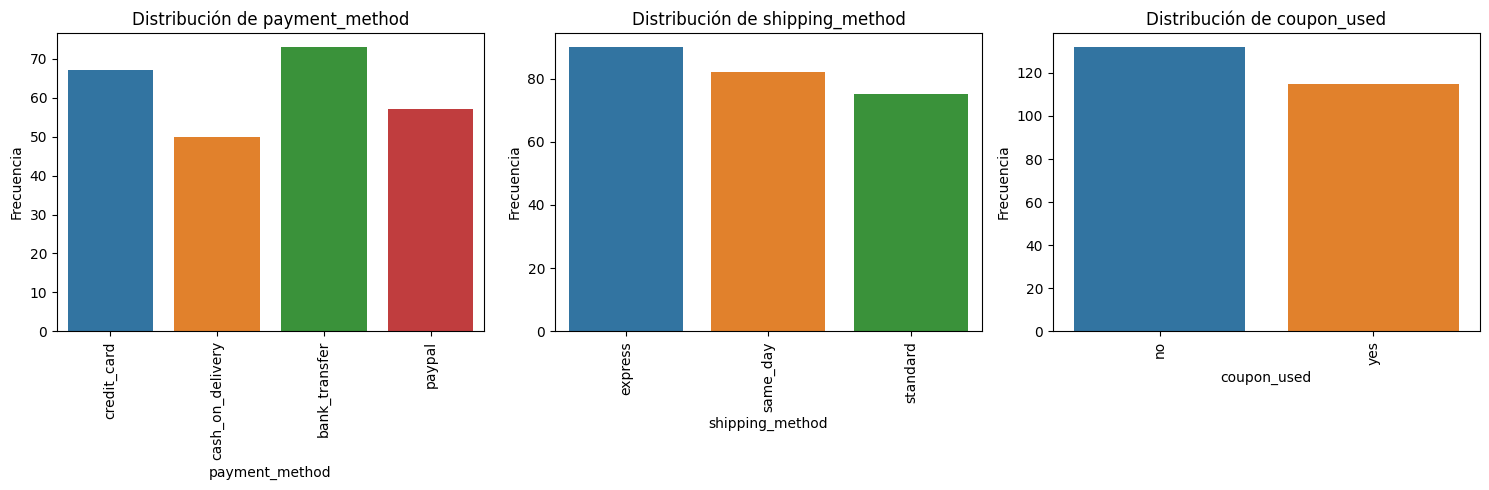

In [21]:
subplot_col_cat(df_nulos)

In [24]:
df_nulos.select_dtypes(include = 'O').isnull().mean()*100

payment_method     87.65
shipping_method    87.65
coupon_used        87.65
dtype: float64

Se ha comprobado que los nulos de las columnas categóricas son debido a que no se ha realizado la compra, por lo tanto, no tienen método de pago, método de transporte ni se ha utilizado ningún cupón

In [32]:
df.loc[:,df.select_dtypes(include= 'O').columns] = df.select_dtypes(include='O').fillna('no_conversion')

In [34]:
df.isnull().mean()*100

user_id             0.0
group               0.0
visit_date          0.0
conversion          0.0
product_category    0.0
product_id          0.0
product_name        0.0
quantity            0.0
price               2.0
discount            2.0
total_value         0.0
payment_method      0.0
shipping_method     0.0
region              0.0
customer_age        2.0
customer_gender     0.0
device              0.0
session_duration    0.0
coupon_used         0.0
browser             0.0
referral_source     0.0
conversion_str      0.0
dtype: float64

# Outliers Numéricas

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2000.0,1000.500000,577.494589,1.00,500.7500,1000.500,1500.250,2000.00
conversion,2000.0,0.123500,0.329093,0.00,0.0000,0.000,0.000,1.00
product_id,2000.0,1501.560000,287.188372,1000.00,1256.0000,1510.500,1746.500,1998.00
quantity,2000.0,0.371000,1.096339,0.00,0.0000,0.000,0.000,5.00
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
total_value,2000.0,51.754830,234.575099,0.00,0.0000,0.000,0.000,2904.07
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00
session_duration,2000.0,15.633500,8.692235,1.00,8.0000,16.000,23.000,30.00


In [42]:
def subplot_col_num (dataframe):


    col_nums = dataframe.select_dtypes(include= 'number').columns
    num_graph = len(col_nums)

    num_rows = (num_graph +2 )//2


    fig, axes = plt.subplots(num_graph, 2, figsize=(15, num_rows*5))

    for i, col in enumerate(col_nums):

        sns.histplot(data=dataframe, x=col, ax=axes[i,0], bins=200)
        axes[i,0].set_title(f'Distribución de {col}')
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel('Frecuencia')

        sns.boxplot(data=dataframe, x=col, ax = axes[i,1])
        axes[i,1].set_title(f'Boxplot de {col}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

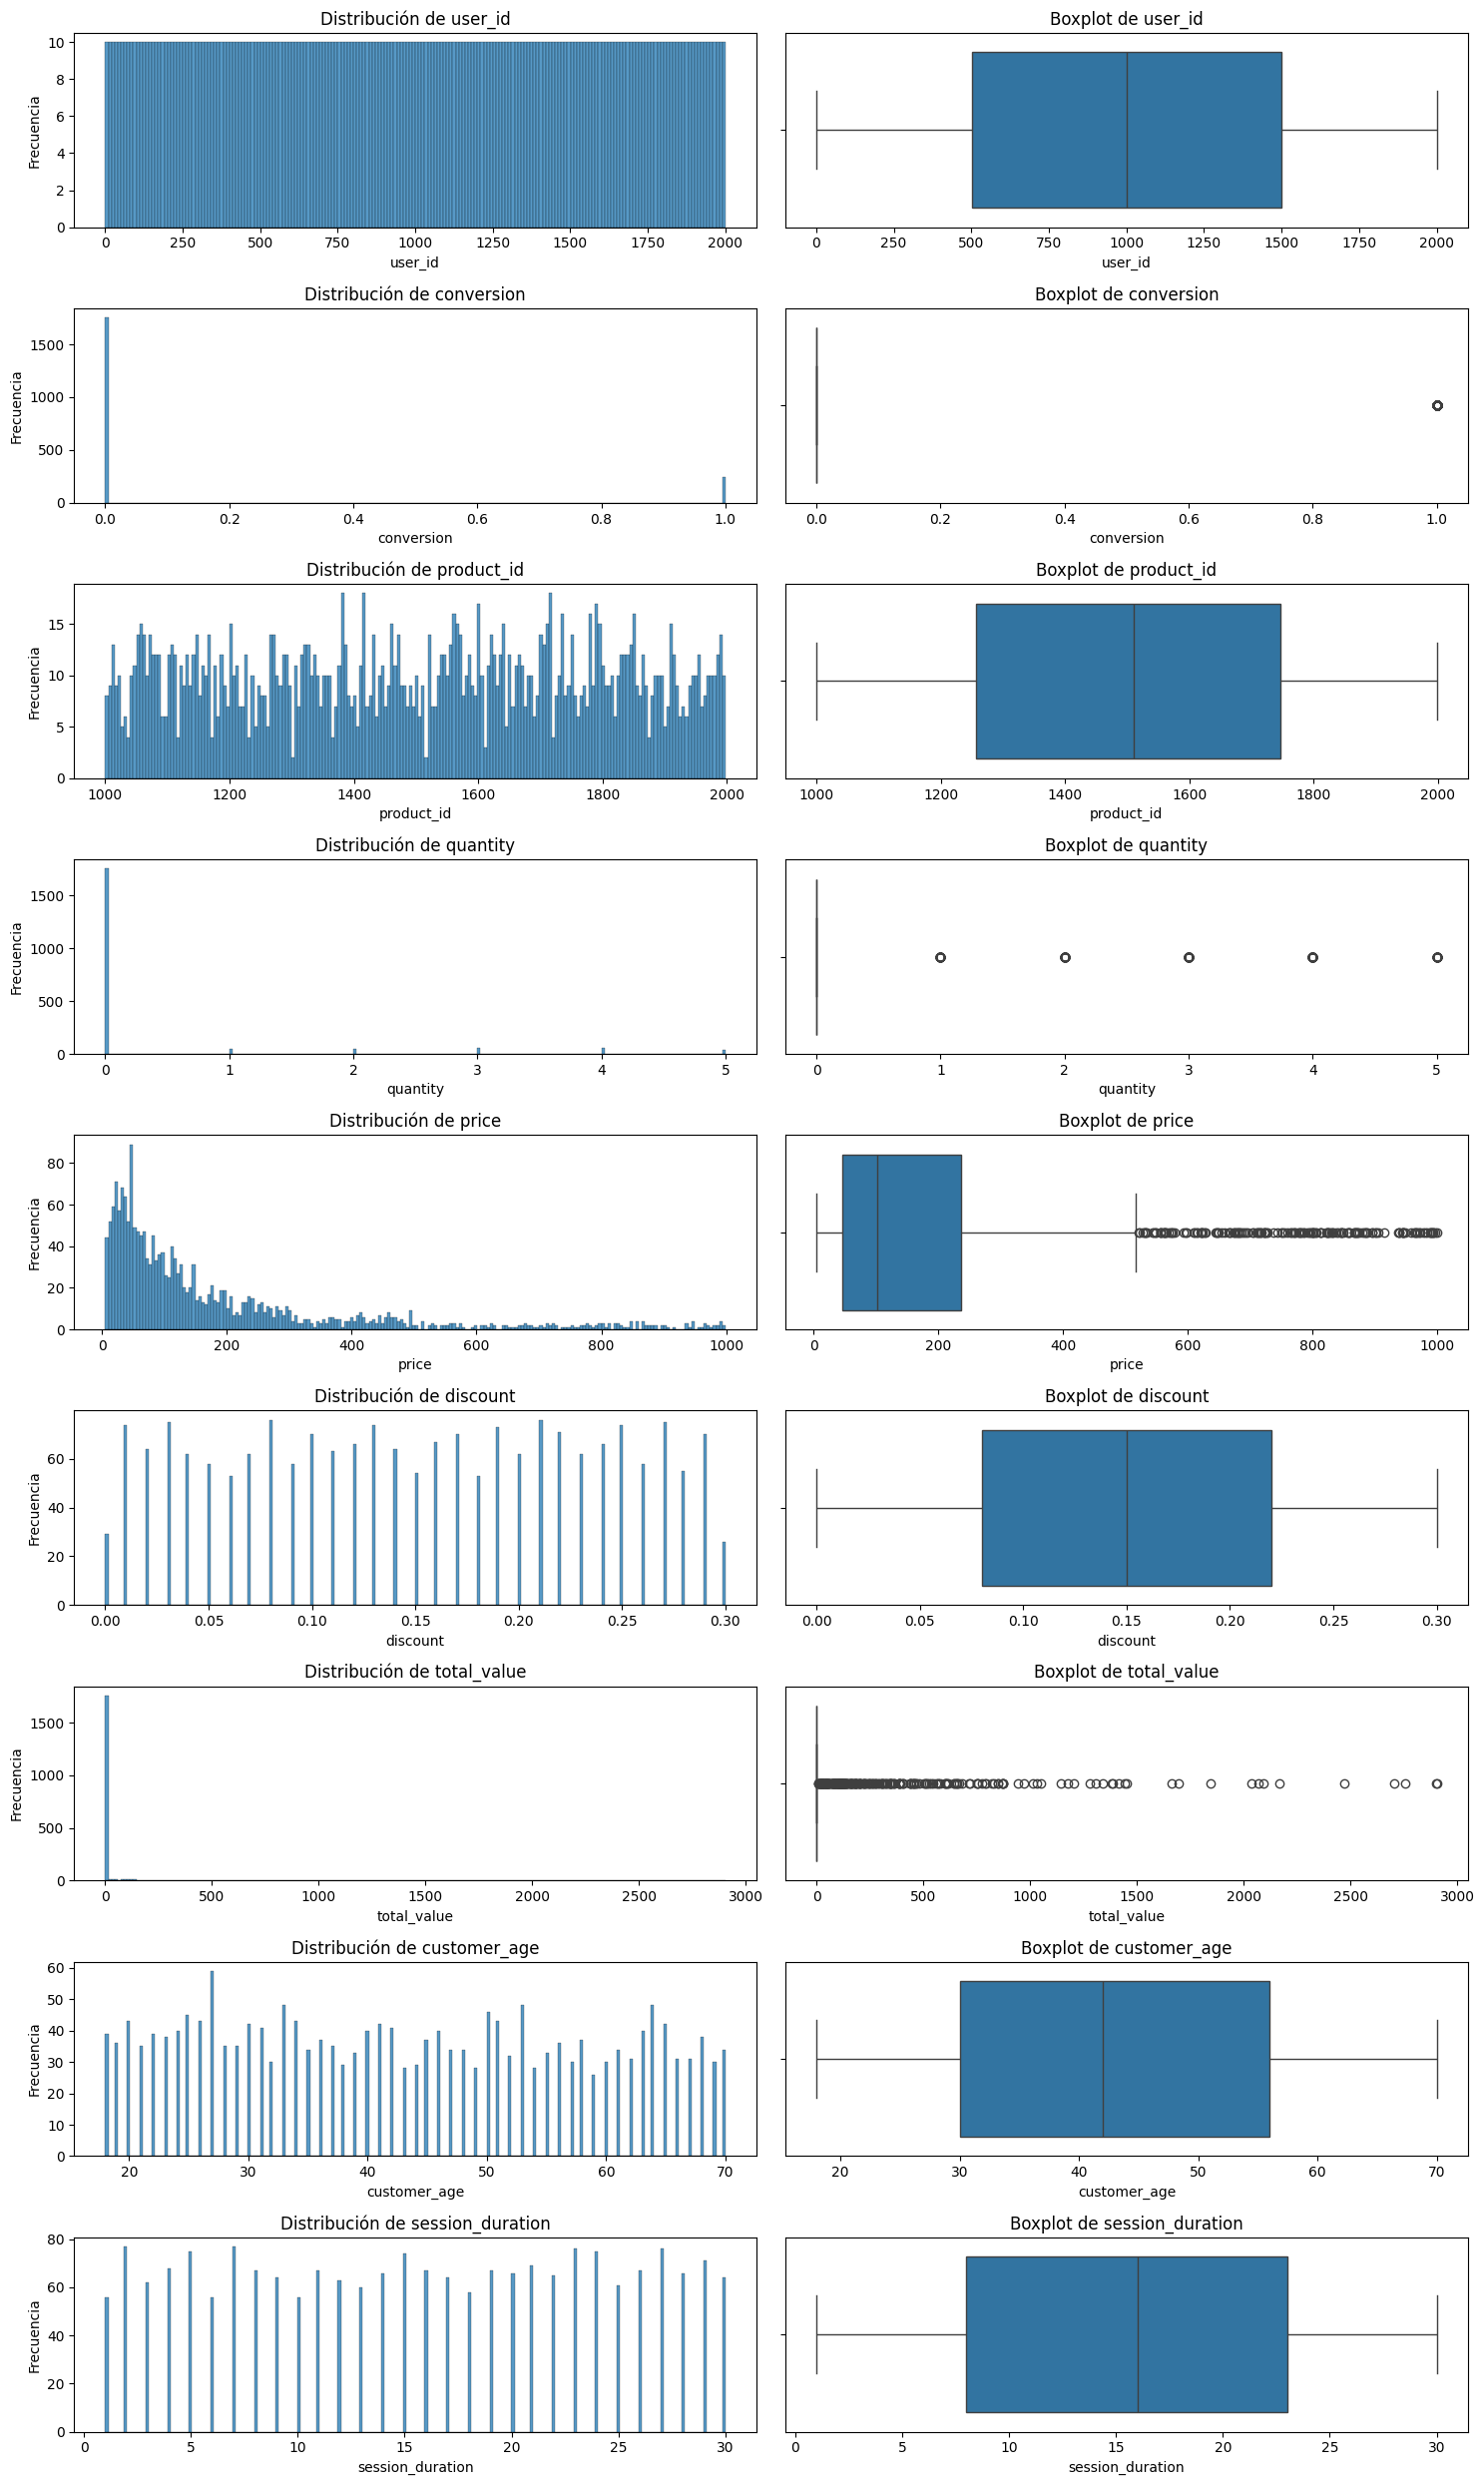

In [43]:
subplot_col_num(df)

In [62]:
def calculo_outliers (df, cols):
    for col in cols:
        q_75 = df[col].quantile(0.75)
        q_25 = df[col].quantile(0.25)
        rango_itq = q_75-q_25
        inferior = q_25 - (rango_itq*1.5)
        superior = q_75 + (rango_itq*1.5)

        outliers = df[(df[col]< inferior) | (df[col] > superior)]
        num_outliers = len(outliers)

        per_outliers = num_outliers/df.shape[0]*100

        print(f'En la columna {col.upper()} tenemos un total de {num_outliers} outliers, lo que representa un {per_outliers}% del total')




In [63]:
calculo_outliers(df,['price', 'total_value'])

En la columna PRICE tenemos un total de 161 outliers, lo que representa un 8.05% del total
En la columna TOTAL_VALUE tenemos un total de 247 outliers, lo que representa un 12.35% del total


# Nulos Numericas

In [64]:
df_nulos.select_dtypes(include='number').isnull().mean()*100

price           2.0
discount        2.0
customer_age    2.0
dtype: float64

In [65]:
df_nulos.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.155,998.88
discount,1960.0,0.150224,0.086591,0.00,0.0800,0.150,0.220,0.30
customer_age,1960.0,43.156633,15.361675,18.00,30.0000,42.000,56.000,70.00


In [66]:
df_filled_simple = df.fillna({
                    'discount': df['discount'].mean(),
                    'customer_age': df['customer_age'].median()
})

In [67]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
dtype: int64

In [72]:
def imputar_iterative(dataframe, lista_columas):
    iter_imputer = IterativeImputer(max_iter=50, 
                                random_state=42)
    data_imputed = iter_imputer.fit_transform(dataframe[lista_columas])
    new_col = [col + "_iterative" for col in lista_columas]
    dataframe[new_col] = data_imputed
    return dataframe


In [79]:
def imputar_knn(dataframe, lista_columas):
    knn_imputer = KNNImputer(n_neighbors=5)
    data_imputed = knn_imputer.fit_transform(dataframe[lista_columas])
    new_col = [col + "_knn" for col in lista_columas]
    dataframe[new_col] = data_imputed
    return dataframe


In [77]:
df_filled_simple = imputar_iterative(df_filled_simple, ['price'])
df_filled_simple.sample()

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative
196,197,b,2022-01-06,1,sports,1665,gym_bag,5,87.85,0.12,...,south,38.0,m,tablet,29,yes,safari,email,yes,87.85


In [80]:
df_filled_simple = imputar_knn(df_filled_simple, ['price'])
df_filled_simple.sample()

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,price,discount,...,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_iterative,price_knn
816,817,b,2022-01-19,0,beauty,1229,lipstick,0,45.32,0.17,...,35.0,f,tablet,24,no_conversion,other,organic,no,45.32,45.32


In [81]:
df_filled_simple.isnull().sum()

user_id              0
group                0
visit_date           0
conversion           0
product_category     0
product_id           0
product_name         0
quantity             0
price               40
discount             0
total_value          0
payment_method       0
shipping_method      0
region               0
customer_age         0
customer_gender      0
device               0
session_duration     0
coupon_used          0
browser              0
referral_source      0
conversion_str       0
price_iterative      0
price_knn            0
dtype: int64

In [83]:
df_filled_simple[['price', 'price_iterative','price_knn']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1960.0,184.572138,211.981538,5.02,46.0925,102.465,236.1550,998.88
price_iterative,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88
price_knn,2000.0,184.572138,209.849945,5.02,46.7975,106.810,231.7425,998.88


In [84]:
df_filled_simple.drop( columns= ['price', 'price_iterative'], inplace = True)

In [86]:
df_filled_simple.isnull().sum()

user_id             0
group               0
visit_date          0
conversion          0
product_category    0
product_id          0
product_name        0
quantity            0
discount            0
total_value         0
payment_method      0
shipping_method     0
region              0
customer_age        0
customer_gender     0
device              0
session_duration    0
coupon_used         0
browser             0
referral_source     0
conversion_str      0
price_knn           0
dtype: int64

In [87]:
df_filled_simple.to_csv('../data/data_limpios_nonulos.csv', index = False)